### Uplading and cleaning SIMD data

Set working directory:

In [66]:
# sorting out working directory
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\klara\OneDrive\Skrivebord\project_1_data


Import libraries:

In [67]:
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import pandas as pd

Uploading SIMD 2016 (already adapted the original SIMD file to only include Edinburgh data):

In [68]:
# Load the Excel file
simd_2016 = pd.read_excel('edinburgh_simd.xlsx')

simd_2016


,Data_Zone,Intermediate_Zone,Council_area,Total_population,Working_age_population_revised,Income_rate,Income_count,Employment_rate,Employment_count,CIF,...,drive_secondary,PT_GP,PT_Post,PT_retail,crime_count,crime_rate,overcrowded_count,nocentralheat_count,overcrowded_rate,nocentralheat_rate
0,S01008417,Balerno and Bonnington Village,City of Edinburgh,726,424,0.05,35,0.03,15,35,...,4.351439,18.449972,11.608202,12.035461,12.005635,165.366873,17,8,0.023416,0.011019
1,S01008418,Balerno and Bonnington Village,City of Edinburgh,710,397,0.01,10,0.02,10,35,...,5.088535,16.794386,9.184798,9.493201,10.004696,140.911209,7,10,0.010116,0.014451
2,S01008419,Balerno and Bonnington Village,City of Edinburgh,526,326,0.04,25,0.05,15,55,...,3.239340,16.062553,7.229048,7.489276,9.004226,171.183008,30,0,0.060000,0.000000
3,S01008420,Balerno and Bonnington Village,City of Edinburgh,488,287,0.04,20,0.03,5,35,...,3.357228,13.718939,4.722868,4.959664,4.001878,82.005703,2,0,0.004202,0.000000
4,S01008421,Balerno and Bonnington Village,City of Edinburgh,885,543,0.12,110,0.09,45,95,...,2.830600,14.692325,6.992180,7.228869,12.005635,135.656892,61,6,0.071096,0.006993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,S01009009,Queensferry West,City of Edinburgh,448,266,0.22,100,0.19,50,140,...,5.844170,5.657038,5.655956,7.674181,7.003287,156.323372,73,9,0.153361,0.018908
593,S01009010,Queensferry West,City of Edinburgh,1020,702,0.05,45,0.04,30,40,...,6.295734,6.878526,6.880426,8.896846,14.006574,137.319354,59,12,0.057786,0.011753
594,S01009011,Queensferry West,City of Edinburgh,878,635,0.01,10,0.03,20,40,...,6.883304,10.710345,10.711138,12.728172,10.004696,113.948699,27,4,0.031070,0.004603
595,S01009012,Queensferry West,City of Edinburgh,751,504,0.02,15,0.02,10,35,...,6.985835,8.741755,8.768062,10.787347,8.003757,106.574656,28,11,0.037234,0.014628


Check for duplicates:

In [69]:
# Find duplicates
duplicates = simd_2016[simd_2016.duplicated()]

# Display duplicates
print(duplicates)

Empty DataFrame
Columns: [Data_Zone, Intermediate_Zone, Council_area, Total_population, Working_age_population_revised, Income_rate, Income_count, Employment_rate, Employment_count, CIF, ALCOHOL, DRUG, SMR, DEPRESS, LBWT, EMERG, Attendance, Attainment, Noquals, NEET, HESA, drive_petrol, drive_GP, drive_PO, drive_primary, drive_retail, drive_secondary, PT_GP, PT_Post, PT_retail, crime_count, crime_rate, overcrowded_count, nocentralheat_count, overcrowded_rate, nocentralheat_rate]
Index: []

[0 rows x 36 columns]


### Uploading and cleaning datazone data

In [70]:
from simpledbf import Dbf5

# Path to .dbf file
datazone_dbf_path = 'DataZone2011/SG_DataZone_Bdry_2011_EDB.dbf'

# Read the .dbf file
datazone_dbf = Dbf5(datazone_dbf_path)

# Convert to a df
datazone_dbf = datazone_dbf.to_dataframe()

datazone_dbf


,DataZone,Name,TotPop2011,ResPop2011,HHCnt2011,StdAreaHa,StdAreaKm2,Shape_Leng,Shape_Area,popdiff
0,S01008417,Balerno and Bonnington Village - 01,726,726,299,1029.993186,10.299931,20191.721420,1.029993e+07,23
1,S01008418,Balerno and Bonnington Village - 02,692,692,312,2357.049745,23.570499,25944.861787,2.357050e+07,1
2,S01008419,Balerno and Bonnington Village - 03,525,500,193,136.645688,1.366457,5738.935106,1.366457e+06,-26
3,S01008420,Balerno and Bonnington Village - 04,476,476,190,10.519669,0.105197,1890.096713,1.051967e+05,5
4,S01008421,Balerno and Bonnington Village - 05,858,858,394,14.654407,0.146542,2645.609037,1.465441e+05,-21
...,...,...,...,...,...,...,...,...,...,...
592,S01009009,Queensferry West - 01,476,476,252,21.039352,0.210393,2484.606370,2.103935e+05,10
593,S01009010,Queensferry West - 02,1021,1021,404,20.571212,0.205711,2549.606615,2.057121e+05,38
594,S01009011,Queensferry West - 03,870,869,319,15.323298,0.153233,1737.741513,1.532330e+05,-13
595,S01009012,Queensferry West - 04,752,752,296,11.924532,0.119244,1694.365106,1.192453e+05,-16


Upload data zone shp and visualise:

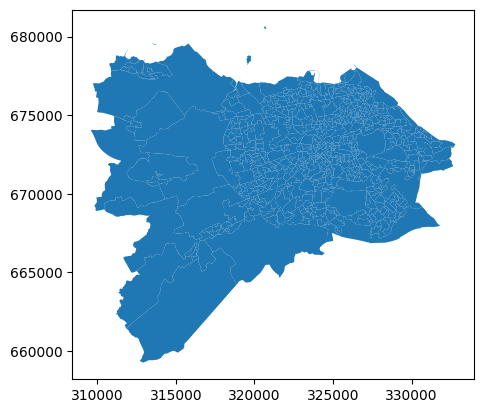

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your .shp file
datazone_shp_path = 'DataZone2011/SG_DataZone_Bdry_2011_EDB.shp'

# Read the .shp file into a GeoDataFrame
datazone_shp = gpd.read_file(datazone_shp_path)

# Plot the GeoDataFrame
datazone_shp.plot()

# Show the plot
plt.show()

### Uploading and cleaning tobacco outlet data:

In [72]:
# Path to .dbf file
tobacco_dbf_path = 'tobaccoOutlets19/tobaccoOutlets2019.dbf'

# Read the .dbf file
tobacco_dbf = Dbf5(tobacco_dbf_path)

# Convert to a df
tobacco_dbf = tobacco_dbf.to_dataframe()

tobacco_dbf

,Address,ProductSol,CompanyNam,Status,lon,lat,PC,EA,NO
0,"Waverley Station, EH1 1BB, Scotland",Tobacco And Nicotine Vapour Products,WH Smith Travel Limited,Active,-3.189970,55.951998,EH1 1BB,325817,673860
1,"Unit U23, Princes Mall EH1 1BQ, Scotland",Tobacco Only,Glenkeir Whiskies Limited,Active,-3.190984,55.952645,EH1 1BQ,325708,673929
2,"Princes Mall, Princes Street EH1 1BQ, Scotland",Tobacco And Nicotine Vapour Products,Sainsbury's Supermarkets Ltd,Active,-3.190962,55.952638,EH1 1BQ,325708,673929
3,"Unit 11 Waverley Railway Station, 4 Waverley B...",Tobacco Only,Select Service Partner Limited,Active,-3.189970,55.951998,EH1 1BQ,325708,673929
4,"65a, Cockburn street EH1 1BU, Scotland",Tobacco And Nicotine Vapour Products,paper rack,Active,-3.188549,55.950617,EH1 1BU,325880,673700
...,...,...,...,...,...,...,...,...,...
877,"36 Blackford Ave, EH9 2PP, Scotland",Tobacco Only,AVENUE STORES LTD,Active,-3.187623,55.927442,EH9 2PP,325882,671139
878,"59 Mayfield Road, EH9 3AA, Scotland",Tobacco And Nicotine Vapour Products,A.S Mini Market,Active,-3.176093,55.930556,EH9 3AA,326630,671446
879,"Margiotta Limited, 86-88 Mayfield Road EH9 3AF...",Tobacco And Nicotine Vapour Products,Margiotta ltd,Active,-3.175754,55.929534,EH9 3AF,326643,671323
880,"Kings Building, University of Edinburgh, Mary ...",Tobacco And Nicotine Vapour Products,Edinburgh University Students Assosciation,Active,-3.172868,55.923130,EH9 3DW,326831,670550


In [73]:
# Find duplicates
duplicates = tobacco_dbf[tobacco_dbf.duplicated()]

# Print the number of duplicates
print("Number of duplicates:", len(duplicates))

# Display duplicates
duplicates


Number of duplicates: 0


,Address,ProductSol,CompanyNam,Status,lon,lat,PC,EA,NO


Double checked the tobacco outlets dataset, and the 12 duplicates listed above are in fact exact duplicates of retailers already included, so we will remove them:

In [43]:
# Drop duplicates
tobacco_dbf = tobacco_dbf.drop_duplicates()

# Now tobacco_dbf contains the df without duplicates

Upload tobacco shp and visualise:

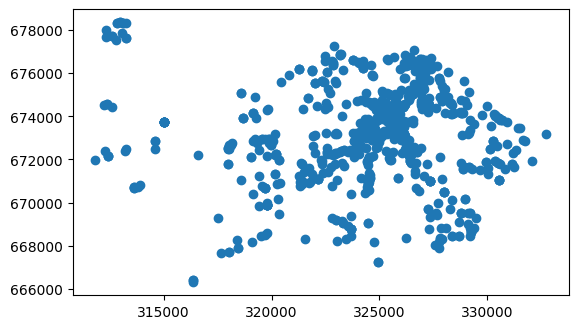

In [44]:
# Path to .shp file
tobacco_shp_path = 'tobaccoOutlets19/tobaccoOutlets2019.shp'

# Read the .shp file into a GeoDataFrame
tobacco_shp = gpd.read_file(tobacco_shp_path)

# Drop all duplicates based on the attribute data
tobacco_shp_unique = tobacco_shp.drop_duplicates()

# Plot the GeoDataFrame to visualize the result after dropping duplicates
tobacco_shp_unique.plot()

# Show the plot
plt.show()

# Save the cleaned GeoDataFrame as a new shapefile
output_path = 'tobaccoOutlets19/tobaccoOutlets2019_NoDuplicates.shp'
tobacco_shp_unique.to_file(output_path)

### Combining and mapping datazones and tobacco outlets

C:\Users\klara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3488: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


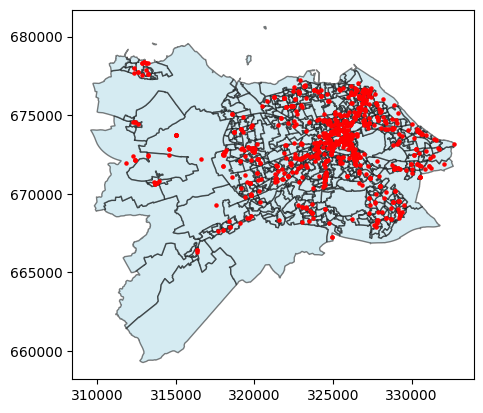

In [45]:
import geopandas as gpd

# Load the datazones shapefile
datazone_shp_path = 'DataZone2011/SG_DataZone_Bdry_2011_EDB.shp'
datazones = gpd.read_file(datazone_shp_path)

# Load the tobacco outlets shapefile
tobacco_shp_path = 'tobaccoOutlets19/tobaccoOutlets2019.shp'
tobacco_outlets = gpd.read_file(tobacco_shp_path)

# Perform a spatial join
# Will add the attributes of the datazones polygons to the tobacco outlet points where each point falls within a polygon
merged_gdf = gpd.sjoin(tobacco_outlets, datazones, how="inner", op="within")

# Now, merged_gdf contains tobacco outlets with their corresponding datazone attributes

fig, ax = plt.subplots()
datazones.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5) # Plot datazones
merged_gdf.plot(ax=ax, marker='o', color='red', markersize=5) # Plot tobacco outlets
plt.show()


Plotting as choropleth map:

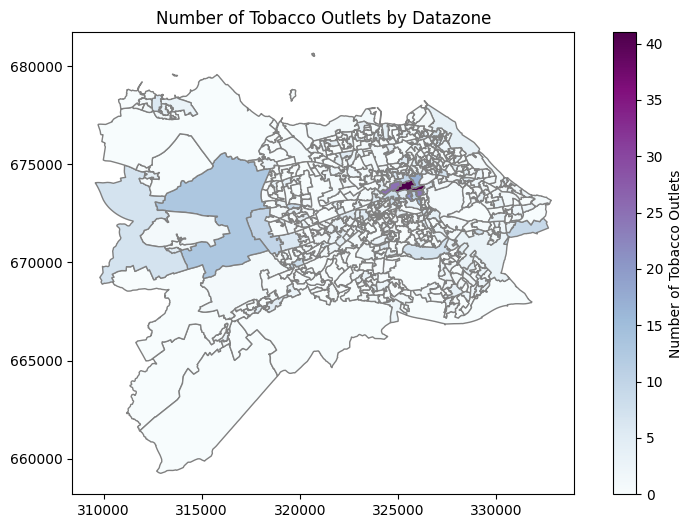

In [46]:
# Step 1: Count the tobacco outlets in each datazone
outlet_counts = merged_gdf.groupby('DataZone').size().reset_index(name='outlet_count')

# Step 2: Merge the counts back with the original datazones GeoDataFrame
# Assuming 'DataZone' is the column in datazones GeoDataFrame that corresponds to the datazone identifier
datazones_with_counts = datazones.merge(outlet_counts, on='DataZone', how='left')

# Replace NaN with 0 for datazones with no tobacco outlets
datazones_with_counts['outlet_count'] = datazones_with_counts['outlet_count'].fillna(0)

# Step 3: Plot the datazones with color gradient based on counts
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
datazones_with_counts.plot(column='outlet_count', ax=ax, legend=True,
                           legend_kwds={'label': "Number of Tobacco Outlets"},
                           cmap='BuPu', edgecolor='grey')

plt.title('Number of Tobacco Outlets by Datazone')
plt.show()

### Now combining all files, including the SIMD

In [47]:
# Ensure the column names for data zones match between the two DataFrames
# 'DataZone' in merged_gdf matches 'Data_Zone' in simd_2016
simd_2016.rename(columns={'Data_Zone': 'DataZone'}, inplace=True)

# Perform the merge: this keeps all rows from both merged_gdf and simd_2016,
# using a 'left' join to keep all data zone entries from merged_gdf and add SIMD data where available
combined_gdf = pd.merge(merged_gdf, simd_2016, how='left', left_on='DataZone', right_on='DataZone')

# Now, combined_gdf contains data from tobacco outlets, data zones, and SIMD 2016, all linked by data zone


In [48]:
print(combined_gdf.columns)

Index(['Address', 'ProductSol', 'CompanyNam', 'Status', 'lon', 'lat', 'PC',
       'EA', 'NO', 'geometry', 'index_right', 'DataZone', 'Name', 'TotPop2011',
       'ResPop2011', 'HHCnt2011', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng',
       'Shape_Area', 'popdiff', 'Intermediate_Zone', 'Council_area',
       'Total_population', 'Working_age_population_revised', 'Income_rate',
       'Income_count', 'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL',
       'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'Noquals', 'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post',
       'PT_retail', 'crime_count', 'crime_rate', 'overcrowded_count',
       'nocentralheat_count', 'overcrowded_rate', 'nocentralheat_rate'],
      dtype='object')


Add outlet count per data zone:

In [49]:
# Merge the outlet counts into combined_gdf
# This adds the outlet_count column to combined_gdf, matching on DataZone
combined_gdf = combined_gdf.merge(outlet_counts, on='DataZone', how='left')

# Replace NaN with 0 for datazones with no tobacco outlets (if any)
combined_gdf['outlet_count'] = combined_gdf['outlet_count'].fillna(0)

# Now, combined_gdf includes a count of tobacco outlets for each datazone entry

In [50]:
print(combined_gdf.columns)

Index(['Address', 'ProductSol', 'CompanyNam', 'Status', 'lon', 'lat', 'PC',
       'EA', 'NO', 'geometry', 'index_right', 'DataZone', 'Name', 'TotPop2011',
       'ResPop2011', 'HHCnt2011', 'StdAreaHa', 'StdAreaKm2', 'Shape_Leng',
       'Shape_Area', 'popdiff', 'Intermediate_Zone', 'Council_area',
       'Total_population', 'Working_age_population_revised', 'Income_rate',
       'Income_count', 'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL',
       'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'Noquals', 'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post',
       'PT_retail', 'crime_count', 'crime_rate', 'overcrowded_count',
       'nocentralheat_count', 'overcrowded_rate', 'nocentralheat_rate',
       'outlet_count'],
      dtype='object')


Add tobacco outlet density per data zone:

In [51]:
# Calculate tobacco outlet density per square kilometer for each data zone
combined_gdf['outlet_density_per_sq_km'] = combined_gdf['outlet_count'] / combined_gdf['StdAreaKm2']

# Now, combined_gdf includes the density of tobacco outlets per square kilometer as a new feature
print(combined_gdf['outlet_density_per_sq_km'])

0      57.673257
1      57.673257
2      57.673257
3      57.673257
4      57.673257
         ...    
877    11.227377
878    40.960105
879    14.268490
880    14.268490
881    10.245272
Name: outlet_density_per_sq_km, Length: 882, dtype: float64


### Dropping irrelevant columns and reorganising

In [52]:

combined_gdf = combined_gdf.drop(['ProductSol', 'CompanyNam', 'Status',
       'EA', 'NO', 'geometry', 'index_right', 'Name', 'TotPop2011',
       'ResPop2011', 'HHCnt2011', 'popdiff', 'Intermediate_Zone', 'Council_area', 
       'Working_age_population_revised', 'Employment_rate', 'Employment_count', 'CIF', 
       'ALCOHOL','DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'Noquals', 'NEET', 'HESA', 'drive_petrol', 'drive_GP', 'drive_PO',
       'drive_primary', 'drive_retail', 'drive_secondary', 'PT_GP', 'PT_Post',
       'PT_retail', 'overcrowded_count','nocentralheat_count', 'overcrowded_rate', 
       'nocentralheat_rate', 'Address', 'PC', 'lat', 'lon'], axis=1)


Renaming columns:

In [53]:
combined_gdf = combined_gdf.rename(columns={'DataZone': 'data_zone', 'Shape_Leng': 'shape_length',
                                            'Shape_Area': 'shape_area', 'Total_population': 'total_pop', 'Income_rate': 'income_rate',
                                            'Income_count': 'income_count', 'outlet_density_per_sq_km': 'outlet_density'})

In [54]:
print(combined_gdf.columns)

Index(['data_zone', 'StdAreaHa', 'StdAreaKm2', 'shape_length', 'shape_area',
       'total_pop', 'income_rate', 'income_count', 'crime_count', 'crime_rate',
       'outlet_count', 'outlet_density'],
      dtype='object')


Reordering columns:

In [55]:
# Reordering the columns
combined_gdf = combined_gdf[['data_zone', 'total_pop', 'outlet_count', 'outlet_density', 
                             'income_count', 'income_rate', 'crime_count', 'crime_rate',
                             'StdAreaHa', 'StdAreaKm2', 'shape_length', 'shape_area']]

In [56]:
combined_gdf

,data_zone,total_pop,outlet_count,outlet_density,income_count,income_rate,crime_count,crime_rate,StdAreaHa,StdAreaKm2,shape_length,shape_area
0,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
1,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
2,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
3,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
4,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
...,...,...,...,...,...,...,...,...,...,...,...,...
877,S01008611,1352,1,11.227377,30,0.02,21.009861,155.398382,8.906700,0.089068,1976.470005,89066.999834
878,S01008668,651,1,40.960105,25,0.04,14.006574,215.154749,2.441404,0.024414,930.315450,24414.045422
879,S01008588,845,2,14.268490,20,0.02,16.007513,189.438027,14.017050,0.140169,2482.459840,140170.491193
880,S01008588,845,2,14.268490,20,0.02,16.007513,189.438027,14.017050,0.140169,2482.459840,140170.491193


Dropping duplicates (since each data zone is copied for each tobacco outlet present within that datazone):

In [57]:
# Find duplicates
duplicates = combined_gdf[combined_gdf.duplicated()]

# Print the number of duplicates
print("Number of duplicates:", len(duplicates))

# Display duplicates
duplicates

Number of duplicates: 572


,data_zone,total_pop,outlet_count,outlet_density,income_count,income_rate,crime_count,crime_rate,StdAreaHa,StdAreaKm2,shape_length,shape_area
1,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
2,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
3,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
4,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
5,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
...,...,...,...,...,...,...,...,...,...,...,...,...
873,S01008605,774,5,66.079877,20,0.03,16.007513,206.815417,7.566417,0.075666,1808.111246,75664.164662
874,S01008605,774,5,66.079877,20,0.03,16.007513,206.815417,7.566417,0.075666,1808.111246,75664.164662
875,S01008605,774,5,66.079877,20,0.03,16.007513,206.815417,7.566417,0.075666,1808.111246,75664.164662
876,S01008605,774,5,66.079877,20,0.03,16.007513,206.815417,7.566417,0.075666,1808.111246,75664.164662


In [58]:
# Drop duplicates
combined_gdf_1 = combined_gdf.drop_duplicates()

In [59]:
combined_gdf = combined_gdf_1

In [60]:
combined_gdf

,data_zone,total_pop,outlet_count,outlet_density,income_count,income_rate,crime_count,crime_rate,StdAreaHa,StdAreaKm2,shape_length,shape_area
0,S01008676,729,17,57.673257,50,0.07,346.162475,4748.45645,29.476317,0.294764,4133.369517,294763.155287
17,S01008677,856,41,93.413654,65,0.08,568.266722,6638.629934,43.890853,0.438908,5369.610660,438908.524775
58,S01008674,1067,21,214.908510,65,0.06,243.114108,2278.48274,9.771678,0.097716,2215.069578,97716.771875
79,S01008679,1232,24,234.987712,205,0.17,304.142753,2468.691175,10.213305,0.102133,1729.056641,102133.038710
103,S01008678,1338,10,85.467894,95,0.07,248.116456,1854.383081,11.700148,0.117003,2320.590556,117001.471918
...,...,...,...,...,...,...,...,...,...,...,...,...
872,S01008605,774,5,66.079877,20,0.03,16.007513,206.815417,7.566417,0.075666,1808.111246,75664.164662
877,S01008611,1352,1,11.227377,30,0.02,21.009861,155.398382,8.906700,0.089068,1976.470005,89066.999834
878,S01008668,651,1,40.960105,25,0.04,14.006574,215.154749,2.441404,0.024414,930.315450,24414.045422
879,S01008588,845,2,14.268490,20,0.02,16.007513,189.438027,14.017050,0.140169,2482.459840,140170.491193


### Linear regression

float64
object
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     28.40
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.91e-07
Time:                        18:06:52   Log-Likelihood:                -2398.4
No. Observations:                 310   AIC:                             4801.
Df Residuals:                     308   BIC:                             4808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            343.7075    

C:\Users\klara\AppData\Local\Temp\ipykernel_10376\61277156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_gdf['crime_rate'] = pd.to_numeric(combined_gdf['crime_rate'], errors='coerce')


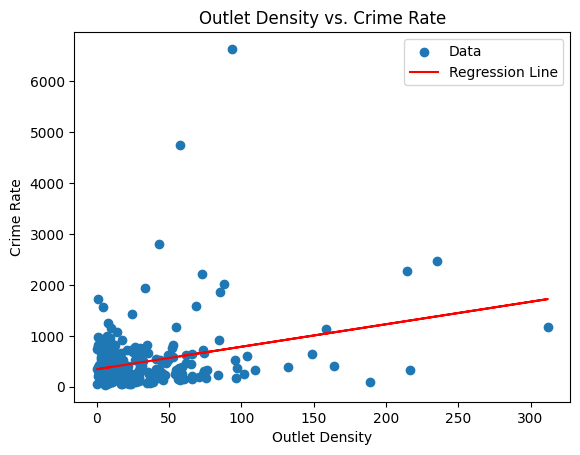

In [61]:
import statsmodels.api as sm

# Check data types
print(combined_gdf['outlet_density'].dtype)
print(combined_gdf['crime_rate'].dtype)

# Convert to float, if not already
combined_gdf['crime_rate'] = pd.to_numeric(combined_gdf['crime_rate'], errors='coerce')

# Add a constant to the predictor variable
X = sm.add_constant(combined_gdf['outlet_density'])
y = combined_gdf['crime_rate']

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop'' tells the model to ignore any NaN values

# Print the summary of the model
print(model.summary())

# Scatter plot
plt.scatter(combined_gdf['outlet_density'], combined_gdf['crime_rate'], label='Data')

# Regression line
# We get the predicted values using the model we've already fit
predicted_values = model.predict(sm.add_constant(combined_gdf['outlet_density']))

# Plotting the regression line
plt.plot(combined_gdf['outlet_density'], predicted_values, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Outlet Density')
plt.ylabel('Crime Rate')
plt.title('Outlet Density vs. Crime Rate')
plt.legend()

# Show plot
plt.show()

In [62]:
# Accessing and printing the full p-value for each predictor
for var, pval in zip(X.columns, model.pvalues):
    print(f"{var}: {pval:.50f}")  # Adjust the number after ':' to display more or less decimal places

const: 0.00000000000000008506929579215385575142765135990104
outlet_density: 0.00000019130801479687462672241930316391345101578736


float64
float64
                            OLS Regression Results                            
Dep. Variable:            income_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001050
Date:                Sun, 03 Mar 2024   Prob (F-statistic):              0.974
Time:                        18:06:52   Log-Likelihood:                 303.39
No. Observations:                 310   AIC:                            -602.8
Df Residuals:                     308   BIC:                            -595.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1000   

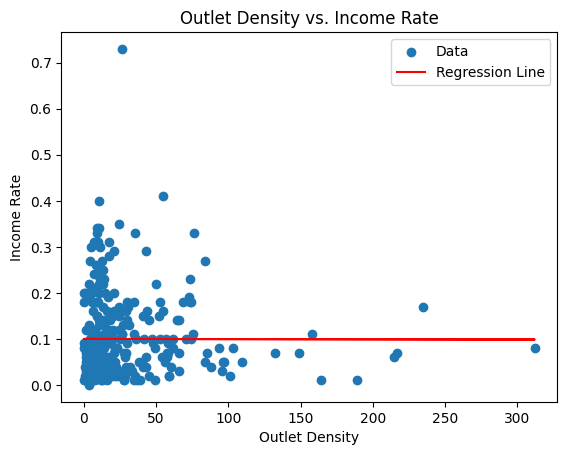

In [63]:
# Check data types
print(combined_gdf['outlet_density'].dtype)
print(combined_gdf['income_rate'].dtype)

# Add a constant to the predictor variable
X = sm.add_constant(combined_gdf['outlet_density'])
y = combined_gdf['income_rate']

# Fit the model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop'' tells the model to ignore any NaN values

# Print the summary of the model
print(model.summary())


# Scatter plot
plt.scatter(combined_gdf['outlet_density'], combined_gdf['income_rate'], label='Data')

# Regression line
# We get the predicted values using the model we've already fit
predicted_values = model.predict(sm.add_constant(combined_gdf['outlet_density']))

# Plotting the regression line
plt.plot(combined_gdf['outlet_density'], predicted_values, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Outlet Density')
plt.ylabel('Income Rate')
plt.title('Outlet Density vs. Income Rate')
plt.legend()

# Show plot
plt.show()

### Trying multiple linear regression

In [64]:
# Add a constant to the predictor variables
X = sm.add_constant(combined_gdf[['outlet_density', 'income_rate']])  # Include both predictors
y = combined_gdf['crime_rate']

# Fit the multiple linear regression model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop' handles NaN values by excluding them

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     25.47
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           5.83e-11
Time:                        18:06:52   Log-Likelihood:                -2388.3
No. Observations:                 310   AIC:                             4783.
Df Residuals:                     307   BIC:                             4794.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            190.4352     50.594      3.

In [65]:
# Add a constant to the predictor variables
X = sm.add_constant(combined_gdf[['outlet_density', 'crime_rate']])  # Include both predictors
y = combined_gdf['income_rate']

# Fit the multiple linear regression model
model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop' handles NaN values by excluding them

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            income_rate   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     10.36
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           4.41e-05
Time:                        18:06:52   Log-Likelihood:                 313.51
No. Observations:                 310   AIC:                            -621.0
Df Residuals:                     307   BIC:                            -609.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0858      0.007     12.